## Project for Stuctural Estimation: Estimating Bank Markup
Meng Yang

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib 
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import numpy.linalg as lin

In [2]:
df = pd.read_csv('/Users/kate/Desktop/bank markup/data.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,intercept,bank,t,balance,default,CAR,...,bigfive,iv1,iv2,iv3,rd,s2,total_balance,total_increment,s_b,s_i
0,0,0,0,0,1,ABC,2014,80980.67,1.22,12.82,...,1,12.533397,4.0018,6.3281,2.6,0.135429,600993.59,66123.24,0.134745,0.132080
1,1,1,1,1,1,ABC,2015,89099.18,1.54,13.40,...,1,13.538360,3.9745,6.1178,1.6,0.123169,669136.64,68143.05,0.133155,0.119139
2,2,2,2,2,1,ABC,2016,97196.39,2.39,13.04,...,1,15.038001,3.9264,3.7040,1.1,0.098249,754521.95,85385.31,0.128819,0.094831
3,3,3,3,3,1,ABC,2017,107206.11,2.37,13.74,...,1,16.194279,4.1604,3.0145,1.1,0.119071,842591.28,88069.33,0.127234,0.113657
4,4,4,4,4,1,ABC,2018,119406.85,1.81,15.12,...,1,17.346290,4.0701,2.5289,1.1,0.131318,939845.18,97253.90,0.127049,0.125452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,155,155,155,1,Zijin Bank,2014,430.01,2.90,12.75,...,0,0.059649,0.0169,0.0364,2.6,0.000806,600993.59,66123.24,0.000715,0.000786
156,156,156,156,156,1,Zijin Bank,2015,523.94,2.71,13.15,...,0,0.073909,0.0181,0.0369,1.6,0.001425,669136.64,68143.05,0.000783,0.001378
157,157,157,157,157,1,Zijin Bank,2016,628.14,2.29,14.42,...,0,0.086230,0.0299,0.0212,1.1,0.001264,754521.95,85385.31,0.000833,0.001220
158,158,158,158,158,1,Zijin Bank,2017,727.38,1.98,13.94,...,0,0.101834,0.0238,0.0353,1.1,0.001181,842591.28,88069.33,0.000863,0.001127


In [3]:
for i in range(5):
    data = df.loc[df['t'] == 2014 + i]
    print(data['s_i'].sum())
df['iv1'].mean()

0.9752693610000001
0.9672841179999999
0.965212986
0.9545342269999999
0.9553345420000001


3.152177118750001

In [4]:
for i in range(5):
    data = df.loc[df['t'] == 2014 + i]
    d = data['default'].mean()
    print(d)

0.9468750000000001
1.1459374999999998
1.4715625000000003
1.5478125
1.4893750000000003


In [5]:
list(df['bank'].unique())

['ABC',
 'Bank of Beijing ',
 'Bank of Communication ',
 'Bank of Hangzhou',
 'Bank of Nanjing',
 'Bank of Ningbo',
 'Bank of Shanghai ',
 'BOC',
 'Changshu Bank',
 'Chengdu Bank',
 'Chongqing Bank',
 'Guangda Bank',
 'Guiyang Bank',
 'Huaxia Bank',
 'Huishang Bank',
 'IBC',
 'ICBC',
 'Jiangsu Bank',
 'Jiangyin Bank',
 'Jinzhou Bank',
 'Merchants Bank',
 'Minsheng Bank',
 'Pingan Bank',
 'Pufa Bank',
 'Sunong Bank',
 'Tianjin Bank',
 'Xingye Bank',
 'Youchu Bank',
 'Zhangjiagang Bank',
 'Zhengzhou Bank',
 'Zhongxin Bank',
 'Zijin Bank']

### Descriptive Analysis 

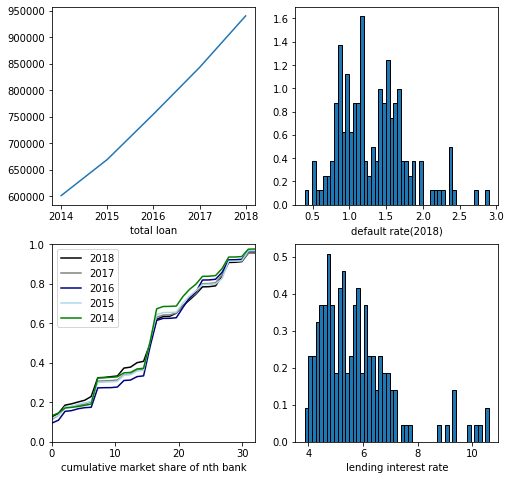

In [6]:
fig1 = plt.figure(figsize=(8,8))

fig11 = fig1.add_subplot(221)
plt.plot(['2014', '2015', '2016', '2017', '2018'],np.unique(df['total_balance'])) 
plt.xlabel('total loan')

fig12 = fig1.add_subplot(222)
plt.hist(df['default'], 50, density = True, edgecolor = 'black')
plt.xlabel('default rate(2018)')

fig13 = fig1.add_subplot(223)
b = np.linspace(0, 32, 32)
cum2018 = np.cumsum(df[df['t'] == 2018]['s_i'])
cum2017 = np.cumsum(df[df['t'] == 2017]['s_i'])
cum2016 = np.cumsum(df[df['t'] == 2016]['s_i'])
cum2015 = np.cumsum(df[df['t'] == 2015]['s_i'])
cum2014 = np.cumsum(df[df['t'] == 2014]['s_i'])
plt.plot(b, cum2018, color = 'black', label = '2018')
plt.plot(b, cum2017, color = 'grey', label = '2017')
plt.plot(b, cum2016, color = 'navy', label = '2016')
plt.plot(b, cum2015, color = 'lightblue', label = '2015')
plt.plot(b, cum2014, color = 'green', label = '2014')
plt.xlim([0,32])
plt.ylim([0,1])
plt.xlabel('cumulative market share of nth bank')
plt.legend(loc='upper left')

fig14 = fig1.add_subplot(224)
plt.hist(df['r'], 50, density = True, edgecolor = 'black')
plt.xlabel('lending interest rate')
plt.show()

fig1.savefig('f1.png')

### Homogenous Coefficient Logit (Estimating demand for lending from banks)

model moment: market share
$$s_{jt} = \frac{exp(\delta_{jt})}{1+\sum_{k\neq j \in J}exp(\delta_{kt})}$$

In [7]:
def s_model(delta):
     
    expv = np.exp(delta)
    sum = np.sum(expv)
    d_model = expv/(1 + sum)
    
    return d_model 

$$s_j^{data} = s_j^{model}(\delta_j)\rightarrow \delta_j$$

In [8]:
# calculate the mean utility delta by contraction mapping 
def meanval(delta_0,tol):
    d = 10
    j = 0
    delta_new = delta_0
    while d > tol:
        s_new = s_model(delta_new)
        delta_new = delta_0 + np.log(s/s_new)    #update rule
        v = np.abs(s_new - s)
        d = max(v)
        j = j+1  
        delta_0 = delta_new.copy()
    
    return delta_new, j

$$\min[\delta_j -x_j'\bar{\beta}+p_j\bar{\alpha)}]'ZWZ'[\delta_j -x_j'\bar{\beta}+p_j\bar{\alpha)}]$$

In [9]:
def gmmobj(theta, *args):
    
    s, x, IV, invA, delta_0, tol = args
    
    delta, j = meanval(delta_0,tol)
    iteration.append(j)
    res = delta - x @ theta
    temp = IV.T @ res
    gmm = temp.T @ invA @ temp
    
    return gmm

In [10]:
%%time
delta_0 = np.zeros(32)
theta_0 = [0, 0, 0, 0]
results = pd.DataFrame(columns=['alpha', 'beta1', 'beta2', 'beta3','gmm object', '# of iteration'])
results = results.fillna(0)
iteration = []
N = df.shape[0]

for i in [2014, 2015, 2016, 2017, 2018]:    
    data = df.loc[df['t'] == i]
    x = data[['r', 'CAR', 'bigfive' ,'intercept']].values
    r = data['r'].values
    IV = data.iloc[:,11:13].values
    s = data['s_i'].values
    invA = lin.inv(IV.T @ IV)
    iteration = []
    
    r = minimize(gmmobj, theta_0, args = (s, x, IV, invA, delta_0, 1e-5), method = 'L-BFGS-B')
    
    results.loc[i, 'alpha'] = r.x[0]
    results.loc[i, 'beta1'] = r.x[1]
    results.loc[i, 'beta2'] = r.x[2]
    results.loc[i, 'beta3'] = r.x[3]
    results.loc[i, '# of iteration'] = iteration[-1]
    results.loc[i, 'gmm object'] = r.fun

    print(r)

      fun: 3.713798703493552e-13
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.46552540e-06, -1.52586203e-06, -2.30569714e-06, -3.50202414e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 3
   status: 0
  success: True
        x: array([-1.44347201,  0.69678082,  0.63089628, -0.0088387 ])
      fun: 1.0096506803622935e-12
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.84361023e-06,  1.94055112e-06, -3.71341989e-06, -3.17768584e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 3
   status: 0
  success: True
        x: array([-1.51337166,  0.65784471,  0.62032171, -0.00757299])
      fun: 4.811250244763203e-13
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.89917733e-06, -8.73497790e-07, -2.56215920e-06, -3.52537138e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 3
 

In [11]:
results

,alpha,beta1,beta2,beta3,gmm object,# of iteration
2014,-1.44347,0.696781,0.630896,-0.0088387,3.7138e-13,175
2015,-1.51337,0.657845,0.620322,-0.00757299,1.00965e-12,112
2016,-1.66097,0.594761,0.678812,-0.010763,4.81125e-13,125
2017,-1.46301,0.494045,0.558272,-0.0263276,5.75112e-13,125
2018,-1.42923,0.486685,0.571766,-0.0355628,1.08167e-12,125


$$\eta_{jt}=\frac{\partial s_{jt}}{\partial r_{jt} s_{jt}}={-\alpha \left(1-s_{jt}\right)}$$

In [12]:
#semi-elasticity
ela = np.zeros((5,32))

for i in range(5):
    alpha = results.iloc[i, 0]
    s = df.loc[df['t'] == 2014 + i]['s_i']
    ela[i,:] = - alpha * (1 - s)
ela

array([[1.25281861, 1.42373199, 1.40737235, 1.43845875, 1.43741986,
        1.43498624, 1.4340779 , 1.25235363, 1.44205612, 1.44040009,
        1.43999122, 1.41440642, 1.44065681, 1.41797018, 1.43824416,
        1.25039286, 1.20247792, 1.42670197, 1.44256323, 1.44117418,
        1.37430903, 1.39142858, 1.40473572, 1.38652053, 1.44255471,
        1.43852096, 1.39193329, 1.3599117 , 1.44302581, 1.44018834,
        1.38961014, 1.44233707],
       [1.33306973, 1.49114026, 1.44890611, 1.50924105, 1.49637908,
        1.50323847, 1.50182599, 1.36844071, 1.51138575, 1.51125783,
        1.50930301, 1.4658254 , 1.51046164, 1.48468173, 1.50803334,
        1.2889263 , 1.31190835, 1.49709909, 1.5130463 , 1.51062332,
        1.44444304, 1.46109627, 1.47086323, 1.46514803, 1.5127165 ,
        1.51033217, 1.47200565, 1.38090293, 1.51302764, 1.50974985,
        1.43766826, 1.51128559],
       [1.50345457, 1.63674457, 1.5868611 , 1.65486758, 1.6452901 ,
        1.65185904, 1.65756391, 1.49805044, 1.6592

FOC of bank lending competition 
$$mc_{jt} = (1-E(F_{jt}))(r^l_{jt}+{\eta_{jt}}^{-1}) - r^d$$

In [13]:
# marginal cost
mc_mat = np.zeros((5,32))
semiela = np.power(ela, -1)
for i in range(5):
    f = df.loc[df['t'] == 2014 + i]['default']
    r = df.loc[df['t'] == 2014 + i]['r']
    rd = df.loc[df['t'] == 2014 + i]['rd']
    mc_mat[i,:] = (1 - 0.01 * f) * (r + semiela[i,:]) - rd
mc_mat

array([[2.4135608 , 4.06874892, 4.2775633 , 4.60837577, 4.75960231,
        4.43370864, 3.90354223, 3.25177494, 5.13610109, 5.05870894,
        4.85525933, 4.26743807, 5.45631349, 4.31245635, 4.71557366,
        3.82550014, 3.82068891, 8.07670669, 4.87320831, 5.09633291,
        3.93296098, 4.587072  , 5.07297496, 4.15090075, 5.65031121,
        4.41218132, 3.9978972 , 4.50890062, 4.89120003, 4.60595855,
        4.87186515, 7.17148295],
       [3.26792181, 4.41842033, 4.84854865, 5.29879366, 5.07494003,
        4.6887579 , 4.25788071, 3.89514178, 5.90961883, 5.18992723,
        5.12582683, 4.6469752 , 6.57528865, 4.76341939, 5.72183546,
        4.39365606, 4.34430996, 9.52654065, 5.10022538, 6.18414481,
        4.78068774, 4.84808191, 6.18960016, 4.81381013, 5.82344945,
        5.24665505, 4.80807242, 4.77311321, 5.25581647, 5.61781867,
        5.11709834, 7.79985655],
       [3.77476385, 3.88451003, 4.14968924, 4.27023578, 4.56042085,
        4.39436105, 3.85363678, 3.49093152, 6.0169

markup
$$\lambda_{jt} = \frac{r^L_{jt}}{mc_{jt}}$$

In [14]:
markup_mat = np.zeros((5,32))
for i in range(5):
    r = df.loc[df['t'] == 2014 + i]['r']
    markup_mat[i,:] = r/(mc_mat[i,:])
markup_mat

array([[1.77218719, 1.47711253, 1.45877444, 1.43217488, 1.41398368,
        1.44348682, 1.50120062, 1.57144947, 1.38626555, 1.38770585,
        1.39848349, 1.45754898, 1.3580598 , 1.45392776, 1.41234142,
        1.48738722, 1.4787909 , 1.25050969, 1.40974889, 1.38727201,
        1.48997156, 1.42356606, 1.38577463, 1.46474232, 1.35744735,
        1.44826324, 1.48327976, 1.42163258, 1.40660778, 1.42207098,
        1.40192715, 1.3065638 ],
       [1.28335752, 1.22215625, 1.20448415, 1.19272431, 1.19607325,
        1.21140825, 1.23300777, 1.24000621, 1.17097231, 1.19654857,
        1.19200281, 1.21369273, 1.1528011 , 1.20921538, 1.17444831,
        1.20400867, 1.20847731, 1.11478032, 1.19994697, 1.16426769,
        1.20484757, 1.20460011, 1.16162592, 1.2048668 , 1.18314756,
        1.19314114, 1.20630462, 1.19209408, 1.19867199, 1.17661327,
        1.19403607, 1.15386737],
       [1.14682368, 1.14042697, 1.13261493, 1.13342688, 1.11831784,
        1.12416798, 1.14437355, 1.1429614 , 1.0968

In [15]:
label = np.unique(df['bank'])
markup={}
markup['2014']=markup_mat[0,:]
markup['2015']=markup_mat[1,:]
markup['2016']=markup_mat[2,:]
markup['2017']=markup_mat[3,:]
markup['2018']=markup_mat[4,:]

markup = pd.DataFrame(markup, index = label)
markup.to_csv(r'/Users/kate/Desktop/bank markup/markup.csv')
markup

,2014,2015,2016,2017,2018
ABC,1.772187,1.283358,1.146824,1.095276,1.076831
BOC,1.477113,1.222156,1.140427,1.123223,1.112230
Bank of Beijing,1.458774,1.204484,1.132615,1.114367,1.106182
Bank of Communication,1.432175,1.192724,1.133427,1.120984,1.112991
Bank of Hangzhou,1.413984,1.196073,1.118318,1.105487,1.104447
Bank of Nanjing,1.443487,1.211408,1.124168,1.103108,1.098123
Bank of Ningbo,1.501201,1.233008,1.144374,1.129500,1.104512
Bank of Shanghai,1.571449,1.240006,1.142961,1.116879,1.109161
Changshu Bank,1.386266,1.170972,1.096898,1.086860,1.078435
Chengdu Bank,1.387706,1.196549,1.139135,1.127097,1.121208


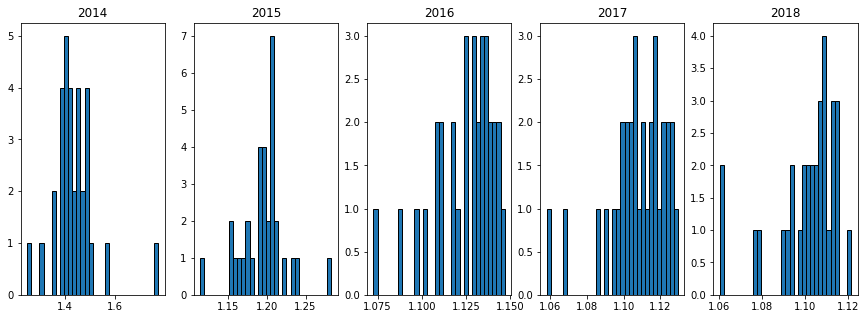

In [16]:
pts = np.linspace(0.8, 1.2, 50)
fig2 = plt.figure(figsize=(15,5))

fig21 = fig2.add_subplot(151)
plt.hist(markup_mat[0, :], 32, edgecolor = 'black') 
plt.title('2014')

fig22 = fig2.add_subplot(152)
plt.hist(markup_mat[1, :], 32, edgecolor = 'black') 
plt.title('2015')

fig23 = fig2.add_subplot(153)
plt.hist(markup_mat[2, :], 32, edgecolor = 'black') 
plt.title('2016')

fig24 = fig2.add_subplot(154)
plt.hist(markup_mat[3, :], 32, edgecolor = 'black') 
plt.title('2017')

fig25 = fig2.add_subplot(155)
plt.hist(markup_mat[4, :], 32, edgecolor = 'black') 
plt.title('2018')

plt.show()
fig2.savefig('f2.png')

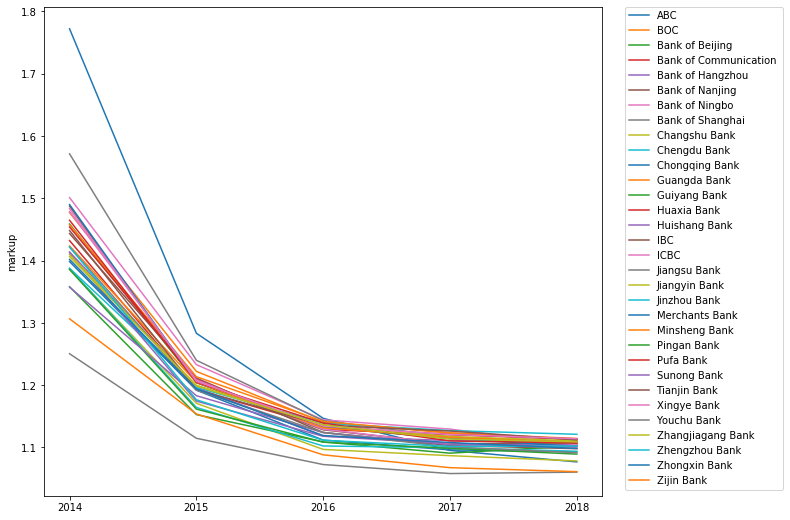

In [17]:
fig3 = plt.figure(figsize=(10,9))
t = np.array([2014, 2015, 2016, 2017, 2018])
for i in range(32):
    lab = label[i]
    plt.plot(t, markup_mat[:,i], label = lab)
    plt.ylabel('markup')
    plt.xticks(t)
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

fig3.savefig('f3.png')

In [18]:
# robustness check with s_b
delta_0 = np.zeros(32)
theta_0 = [0, 0, 0, 0]
results = pd.DataFrame(columns=['alpha', 'beta1', 'beta2', 'beta3','gmm object', '# of iteration'])
results = results.fillna(0)
iteration = []

for i in [2014, 2015, 2016, 2017, 2018]:    
    data = df.loc[df['t'] == i]
    x = data[['r', 'CAR', 'bigfive' ,'intercept']].values
    r = data['r'].values
    IV = data.iloc[:,13:15].values
    s = data['s_b'].values
    invA = np.linalg.inv(IV.T @ IV)
    iteration = []
    
    r = minimize(gmmobj, theta_0, args = (s, x, IV, invA, delta_0, 1e-5), method = 'L-BFGS-B')
    
    results.loc[i, 'alpha'] = r.x[0]
    results.loc[i, 'beta1'] = r.x[1]
    results.loc[i, 'beta2'] = r.x[2]
    results.loc[i, 'beta3'] = r.x[3]
    results.loc[i, '# of iteration'] = iteration[-1]
    results.loc[i, 'gmm object'] = r.fun

    print(r)

results

      fun: 1.8340515918933436e-13
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.68074329e-07,  7.97330138e-07, -1.69495196e-06, -8.23236029e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 35
      nit: 3
   status: 0
  success: True
        x: array([-0.43563696,  0.29711873,  0.23438872, -0.03819419])
      fun: 2.705900909063953e-13
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.47153992e-06, -3.26435410e-08, -2.07005898e-06, -9.79879832e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 3
   status: 0
  success: True
        x: array([-0.51075686,  0.29489477,  0.3203907 , -0.04576348])
      fun: 3.3290779980733627e-13
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.37693466e-06,  4.88612987e-07, -2.24057242e-06, -9.07333836e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 40
      nit: 3


,alpha,beta1,beta2,beta3,gmm object,# of iteration
2014,-0.435637,0.297119,0.234389,-0.0381942,1.83405e-13,295
2015,-0.510757,0.294895,0.320391,-0.0457635,2.7059e-13,265
2016,-0.577104,0.27271,0.443326,-0.0689432,3.32908e-13,236
2017,-0.621887,0.261321,0.656741,-0.0717885,5.70202e-13,200
2018,-0.595755,0.243965,0.577992,-0.0768029,3.47167e-13,170
